In [357]:
import random
import matplotlib.pyplot as plt
import numpy as np

In [358]:
num_pen = 6
razao = (2)**(1/4)
prim = 2000 #microns
media_dia = 890 #microns
massa_total = 5680 #gramas
var = 0.3

In [359]:
dist_norm = []
for _ in range(massa_total):
    dist_norm.append(random.normalvariate(media_dia, media_dia*var))

## Classificação

In [360]:
penei = {}
bins = []
for j in range(num_pen+1):
    lista =[]
    for i in dist_norm:
        if prim*razao/((j+1)*razao) > i >= prim*razao/((j+2)*razao):
            lista.append(i)
    bins.append(prim*razao/((j+1)*razao))
        
    penei.update({str( prim*razao/((j+1)*razao)): lista})
bins = bins[::-1]

In [361]:
x = []
y = []
for nome in penei:
    x.append(np.median(penei[nome]))
    y.append(len(penei[nome]))
x = x[::-1]
y = y[::-1]

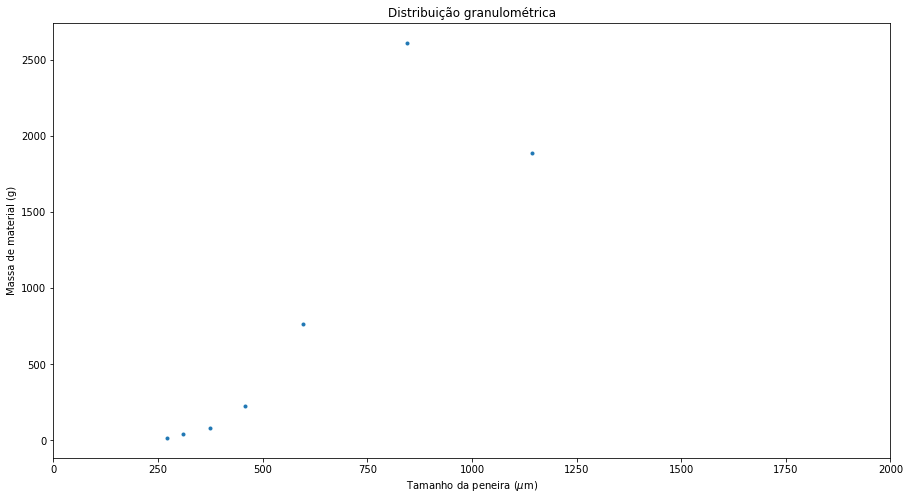

In [362]:
fig = plt.figure(figsize=(15, 8))
plt.plot(x, y, '.')
plt.xlim((math.ceil(0), math.floor(prim)))
plt.title('Distribuição granulométrica')
plt.xlabel('Tamanho da peneira ($\mu$m)')
plt.ylabel('Massa de material (g)')
plt.show()

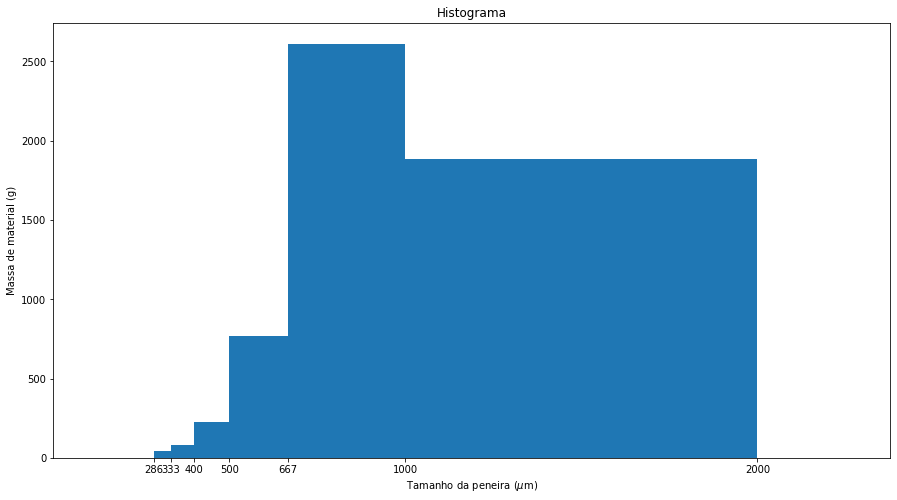

In [363]:
fig = plt.figure(figsize=(15, 8))
plt.xlim((math.ceil(0), math.floor(prim*razao)))
plt.xticks(bins)
ax = plt.hist(dist_norm, bins=bins)
plt.title('Histograma')
plt.xlabel('Tamanho da peneira ($\mu$m)')
plt.ylabel('Massa de material (g)')
plt.show()

In [364]:
# %matplotlib inline

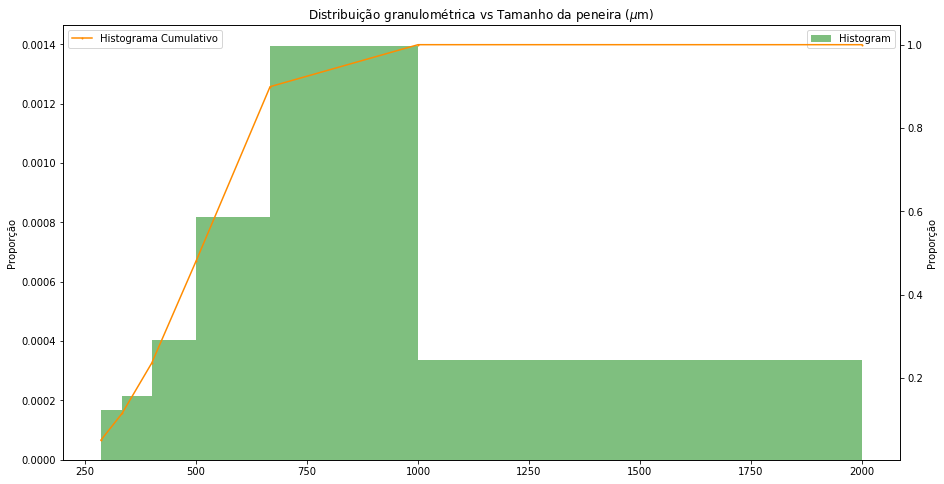

In [365]:
fig = plt.figure(figsize=(15, 8))
ax = plt.axes()
plt.ylabel("Proporção")
values, base, _ = plt.hist(dist_norm, bins = bins, density=True,
                           alpha = 0.5, color = "green",
                           range = range, label = "Histogram")
ax_bis = ax.twinx()
values = np.append(values,0)
ax_bis.plot(base, np.cumsum(values)/ np.cumsum(values)[-1],
            color='darkorange', marker='o', linestyle='-',
            markersize = 1, label = "Histograma Cumulativo" )
plt.title('Distribuição granulométrica vs Tamanho da peneira ($\mu$m)')
plt.xlabel('Tamanho da peneira ($\mu$m)')
plt.ylabel('Proporção')
ax_bis.legend();
ax.legend();
plt.show()